In [262]:
%store -r stats_downwind stats_circle stats_upwind

In [263]:
import xarray as xr
import numpy as np


## Compute cell development stages

## Upwind

In [264]:
# Load the NetCDF data
data_upwind = stats_upwind

# Classification function
def classify_cell_stages_advanced(data):
    cell_area = data['cell_area'].values
    max_dbz = data['max_dbz'].values
    maxETH_20dbz = data['maxETH_20dbz'].values

    stages = np.full(cell_area.shape, 'Unknown', dtype=object)  # Initialize stages array

    for i in range(cell_area.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        for j in range(1, cell_area.shape[1]):  # Iterate over times
            if np.isnan(cell_area[i, j]) or np.isnan(max_dbz[i, j]) or np.isnan(maxETH_20dbz[i, j]):
                continue

            is_developing = (cell_area[i, j] > cell_area[i, j-1] and 
                             max_dbz[i, j] > max_dbz[i, j-1] and 
                             maxETH_20dbz[i, j] > maxETH_20dbz[i, j-1])

            is_mature = (current_stage == 'Developing' and 
                         cell_area[i, j] >= cell_area[i, j-1] and 
                         max_dbz[i, j] >= max_dbz[i, j-1])

            is_dissipating = (current_stage == 'Mature' and 
                              cell_area[i, j] < cell_area[i, j-1] and 
                              max_dbz[i, j] < max_dbz[i, j-1] and 
                              maxETH_20dbz[i, j] < maxETH_20dbz[i, j-1])

            if is_developing:
                current_stage = 'Developing'
            elif is_mature:
                current_stage = 'Mature'
            elif is_dissipating:
                current_stage = 'Dissipating'

            stages[i, j] = current_stage

    return stages

# Apply the classification function
advanced_cell_stages_upwind = classify_cell_stages_advanced(data_upwind)

# Function to extract cell areas for each stage
def get_cell_areas_by_stage(data, stages):
    cell_areas = data['cell_area'].values
    developing_areas = cell_areas[stages == 'Developing']
    mature_areas = cell_areas[stages == 'Mature']
    dissipating_areas = cell_areas[stages == 'Dissipating']

    return developing_areas, mature_areas, dissipating_areas

# Function to extract echo top heights for each stage
def get_eth_by_stage(data, stages):
    eth = data['maxETH_20dbz'].values
    developing_eth = eth[stages == 'Developing']
    mature_eth = eth[stages == 'Mature']
    dissipating_eth = eth[stages == 'Dissipating']

    return developing_eth, mature_eth, dissipating_eth

# Function to extract echo top heights for each stage
def get_dbz_by_stage(data, stages):
    dbz = data['max_dbz'].values
    developing_dbz = dbz[stages == 'Developing']
    mature_dbz = dbz[stages == 'Mature']
    dissipating_dbz = dbz[stages == 'Dissipating']

    return developing_dbz, mature_dbz, dissipating_dbz

# Extract cell variables for each stage
developing_areas, mature_areas, dissipating_areas = get_cell_areas_by_stage(data_upwind, advanced_cell_stages_upwind)   # Cell area
developing_eth, mature_eth, dissipating_eth = get_eth_by_stage(data_upwind, advanced_cell_stages_upwind)   # Echo top height
developing_dbz, mature_dbz, dissipating_dbz = get_dbz_by_stage(data_upwind, advanced_cell_stages_upwind)   # Reflectivity

upwind_cell_areas_bin = [developing_areas, mature_areas, dissipating_areas]
upwind_eth_bin = [developing_eth, mature_eth, dissipating_eth]
upwind_dbz_bin = [developing_dbz, mature_dbz, dissipating_dbz]

## Urban

In [265]:
# Load the NetCDF data
data_urban = stats_circle

# Classification function
def classify_cell_stages_advanced(data):
    cell_area = data['cell_area'].values
    max_dbz = data['max_dbz'].values
    maxETH_20dbz = data['maxETH_20dbz'].values

    stages = np.full(cell_area.shape, 'Unknown', dtype=object)  # Initialize stages array

    for i in range(cell_area.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        for j in range(1, cell_area.shape[1]):  # Iterate over times
            if np.isnan(cell_area[i, j]) or np.isnan(max_dbz[i, j]) or np.isnan(maxETH_20dbz[i, j]):
                continue

            is_developing = (cell_area[i, j] > cell_area[i, j-1] and 
                             max_dbz[i, j] > max_dbz[i, j-1] and 
                             maxETH_20dbz[i, j] > maxETH_20dbz[i, j-1])

            is_mature = (current_stage == 'Developing' and 
                         cell_area[i, j] >= cell_area[i, j-1] and 
                         max_dbz[i, j] >= max_dbz[i, j-1])

            is_dissipating = (current_stage == 'Mature' and 
                              cell_area[i, j] < cell_area[i, j-1] and 
                              max_dbz[i, j] < max_dbz[i, j-1] and 
                              maxETH_20dbz[i, j] < maxETH_20dbz[i, j-1])

            if is_developing:
                current_stage = 'Developing'
            elif is_mature:
                current_stage = 'Mature'
            elif is_dissipating:
                current_stage = 'Dissipating'

            stages[i, j] = current_stage

    return stages

# Apply the classification function
advanced_cell_stages_urban = classify_cell_stages_advanced(data_urban)

# Function to extract cell areas for each stage
def get_cell_areas_by_stage(data, stages):
    cell_areas = data['cell_area'].values
    developing_areas = cell_areas[stages == 'Developing']
    mature_areas = cell_areas[stages == 'Mature']
    dissipating_areas = cell_areas[stages == 'Dissipating']

    return developing_areas, mature_areas, dissipating_areas

# Function to extract echo top heights for each stage
def get_eth_by_stage(data, stages):
    eth = data['maxETH_20dbz'].values
    developing_eth = eth[stages == 'Developing']
    mature_eth = eth[stages == 'Mature']
    dissipating_eth = eth[stages == 'Dissipating']

    return developing_eth, mature_eth, dissipating_eth

# Function to extract echo top heights for each stage
def get_dbz_by_stage(data, stages):
    dbz = data['max_dbz'].values
    developing_dbz = dbz[stages == 'Developing']
    mature_dbz = dbz[stages == 'Mature']
    dissipating_dbz = dbz[stages == 'Dissipating']

    return developing_dbz, mature_dbz, dissipating_dbz

# Extract cell variables for each stage
developing_areas, mature_areas, dissipating_areas = get_cell_areas_by_stage(data_urban, advanced_cell_stages_urban)   # Cell area
developing_eth, mature_eth, dissipating_eth = get_eth_by_stage(data_urban, advanced_cell_stages_urban)   # Echo top height
developing_dbz, mature_dbz, dissipating_dbz = get_dbz_by_stage(data_urban, advanced_cell_stages_urban)   # Reflectivity

urban_cell_areas_bin = [developing_areas, mature_areas, dissipating_areas]
urban_eth_bin = [developing_eth, mature_eth, dissipating_eth]
urban_dbz_bin = [developing_dbz, mature_dbz, dissipating_dbz]

## Downwind

In [266]:
import xarray as xr
import numpy as np

# Load the NetCDF data
data_downwind = stats_downwind

# Classification function
def classify_cell_stages_advanced(data):
    cell_area = data['cell_area'].values
    max_dbz = data['max_dbz'].values
    maxETH_20dbz = data['maxETH_20dbz'].values

    stages = np.full(cell_area.shape, 'Unknown', dtype=object)  # Initialize stages array

    for i in range(cell_area.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        for j in range(1, cell_area.shape[1]):  # Iterate over times
            if np.isnan(cell_area[i, j]) or np.isnan(max_dbz[i, j]) or np.isnan(maxETH_20dbz[i, j]):
                continue

            is_developing = (cell_area[i, j] > cell_area[i, j-1] and 
                             max_dbz[i, j] > max_dbz[i, j-1] and 
                             maxETH_20dbz[i, j] > maxETH_20dbz[i, j-1])

            is_mature = (current_stage == 'Developing' and 
                         cell_area[i, j] >= cell_area[i, j-1] and 
                         max_dbz[i, j] >= max_dbz[i, j-1])

            is_dissipating = (current_stage == 'Mature' and 
                              cell_area[i, j] < cell_area[i, j-1] and 
                              max_dbz[i, j] < max_dbz[i, j-1] and 
                              maxETH_20dbz[i, j] < maxETH_20dbz[i, j-1])

            if is_developing:
                current_stage = 'Developing'
            elif is_mature:
                current_stage = 'Mature'
            elif is_dissipating:
                current_stage = 'Dissipating'

            stages[i, j] = current_stage

    return stages

# Apply the classification function
advanced_cell_stages_downwind = classify_cell_stages_advanced(data_downwind)

# Function to extract cell areas for each stage
def get_cell_areas_by_stage(data, stages):
    cell_areas = data['cell_area'].values
    developing_areas = cell_areas[stages == 'Developing']
    mature_areas = cell_areas[stages == 'Mature']
    dissipating_areas = cell_areas[stages == 'Dissipating']

    return developing_areas, mature_areas, dissipating_areas

# Function to extract echo top heights for each stage
def get_eth_by_stage(data, stages):
    eth = data['maxETH_20dbz'].values
    developing_eth = eth[stages == 'Developing']
    mature_eth = eth[stages == 'Mature']
    dissipating_eth = eth[stages == 'Dissipating']

    return developing_eth, mature_eth, dissipating_eth

# Function to extract echo top heights for each stage
def get_dbz_by_stage(data, stages):
    dbz = data['max_dbz'].values
    developing_dbz = dbz[stages == 'Developing']
    mature_dbz = dbz[stages == 'Mature']
    dissipating_dbz = dbz[stages == 'Dissipating']

    return developing_dbz, mature_dbz, dissipating_dbz

# Extract cell variables for each stage
developing_areas, mature_areas, dissipating_areas = get_cell_areas_by_stage(data_downwind, advanced_cell_stages_downwind)   # Cell area
developing_eth, mature_eth, dissipating_eth = get_eth_by_stage(data_downwind, advanced_cell_stages_downwind)   # Echo top height
developing_dbz, mature_dbz, dissipating_dbz = get_dbz_by_stage(data_downwind, advanced_cell_stages_downwind)   # Reflectivity

downwind_cell_areas_bin = [developing_areas, mature_areas, dissipating_areas]
downwind_eth_bin = [developing_eth, mature_eth, dissipating_eth]
downwind_dbz_bin = [developing_dbz, mature_dbz, dissipating_dbz]

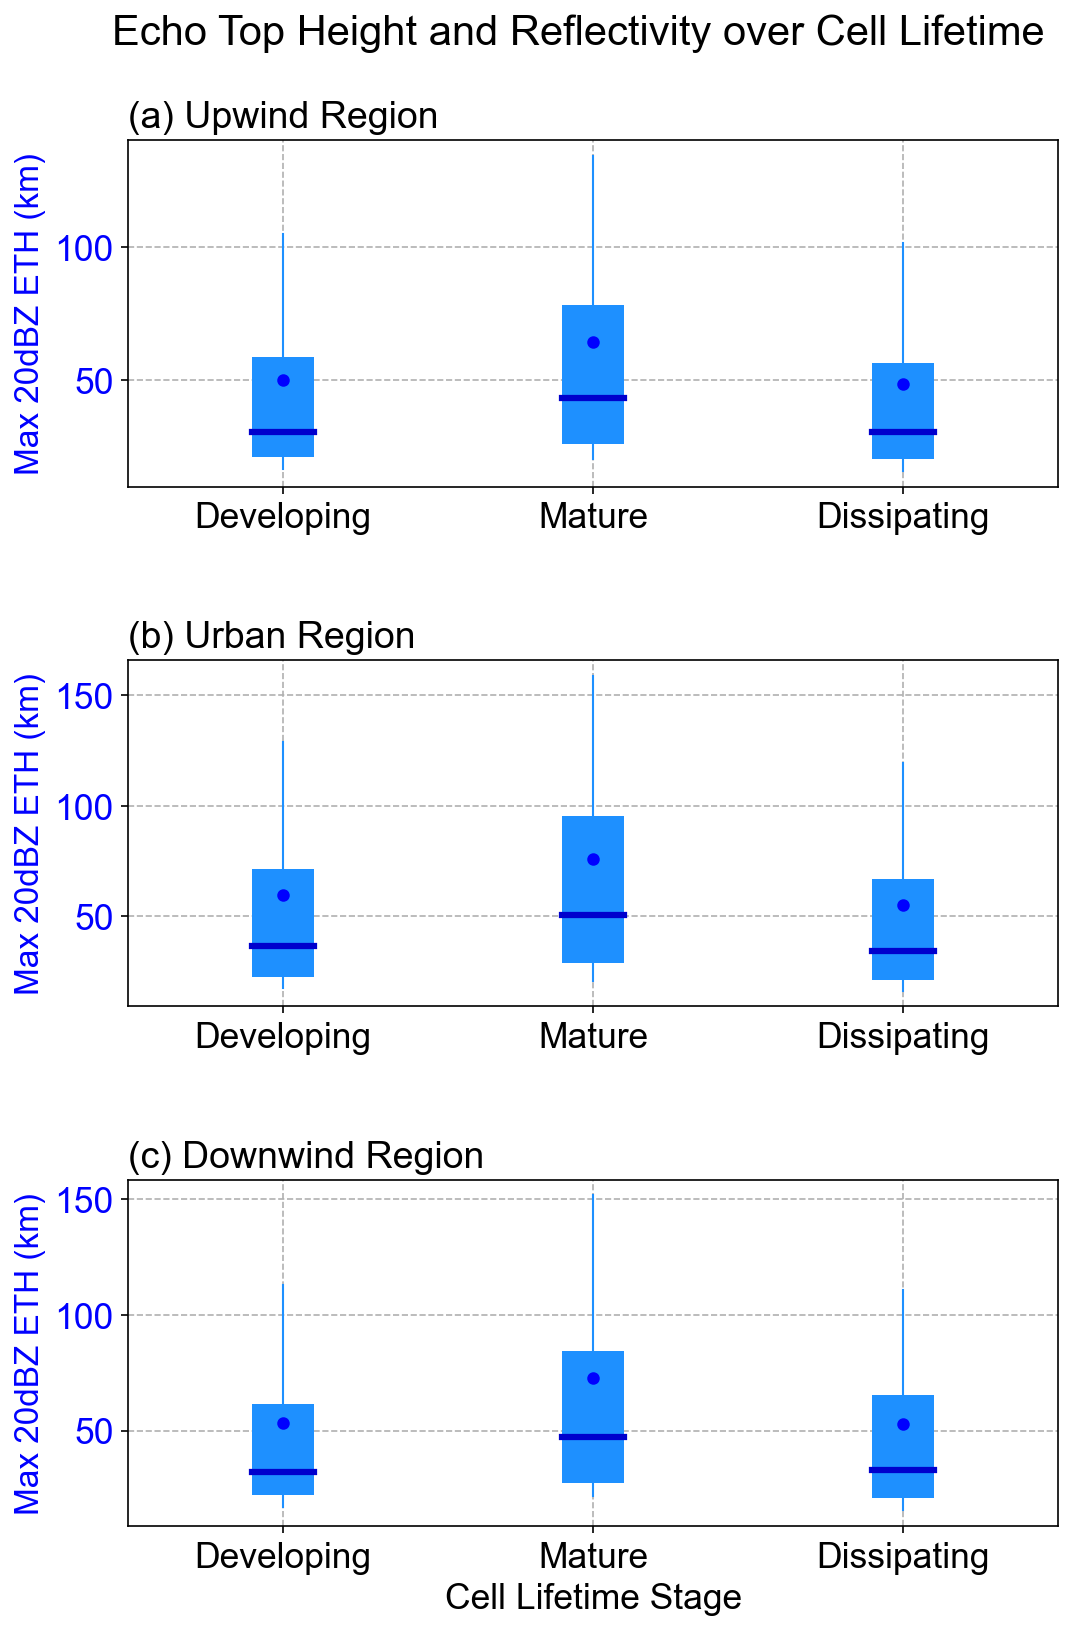

In [267]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a 3x1 subplot layout
fig, axes = plt.subplots(3, 1, figsize=[8, 12], dpi=150)
fig.subplots_adjust(hspace=0.5)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('Echo Top Height and Reflectivity over Cell Lifetime', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# First subplot (Upwind Cells)
ax1 = axes[0]
# Boxplot on the left y-axis
ax1.boxplot(upwind_cell_areas_bin, positions=[1, 2, 3], patch_artist=True, widths=0.2, notch=False, manage_ticks=False,
            boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
            showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10,90], meanline=False, showcaps=False)
ax1.set_ylabel('Max 20dBZ ETH (km)', color='blue', fontsize=16)
ax1.set_xlim(0.5, 3.5)
#ax1.set_ylim(0, 22)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('(a) Upwind Region', loc='left', fontsize=18)
#ax1.set_xlabel('Cell Lifetime Stage')
ax1.grid(ls='--')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(bin_labels)

# Second subplot (Split Cells)
ax2 = axes[1]
# Boxplot on the left y-axis
ax2.boxplot(urban_cell_areas_bin, positions=[1,2,3], patch_artist=True, widths=0.2, notch=False, manage_ticks=False,
            boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
            showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10,90], meanline=False, showcaps=False)
ax2.set_ylabel('Max 20dBZ ETH (km)', color='blue', fontsize=16)
ax2.set_xlim(0.5, 3.5)
#ax2.set_ylim(0, 22)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_title('(b) Urban Region', loc='left', fontsize=18)
#ax2.set_xlabel('Cell Lifetime Stage')
ax2.grid(ls='--')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(bin_labels)

# Third subplot (Non-upwind Cells)
ax3 = axes[2]
# Boxplot on the left y-axis
ax3.boxplot(downwind_cell_areas_bin, positions=[1,2,3], patch_artist=True, widths=0.2, notch=False, manage_ticks=False,
            boxprops=boxprops_, medianprops=medianprops_, whis=[10,90], whiskerprops=whiskerprops_, 
            showfliers=False, showmeans=True, meanprops=meanpointprops_, meanline=False, showcaps=False)
ax3.set_ylabel('Max 20dBZ ETH (km)', color='blue', fontsize=16)
ax3.set_xlim(0.5, 3.5)
#ax3.set_ylim(0, 22)
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_title('(c) Downwind Region', loc='left', fontsize=18)
ax3.set_xlabel('Cell Lifetime Stage')
ax3.grid(ls='--')
ax3.set_xticks([1, 2, 3])
ax3.set_xticklabels(bin_labels)

plt.show()


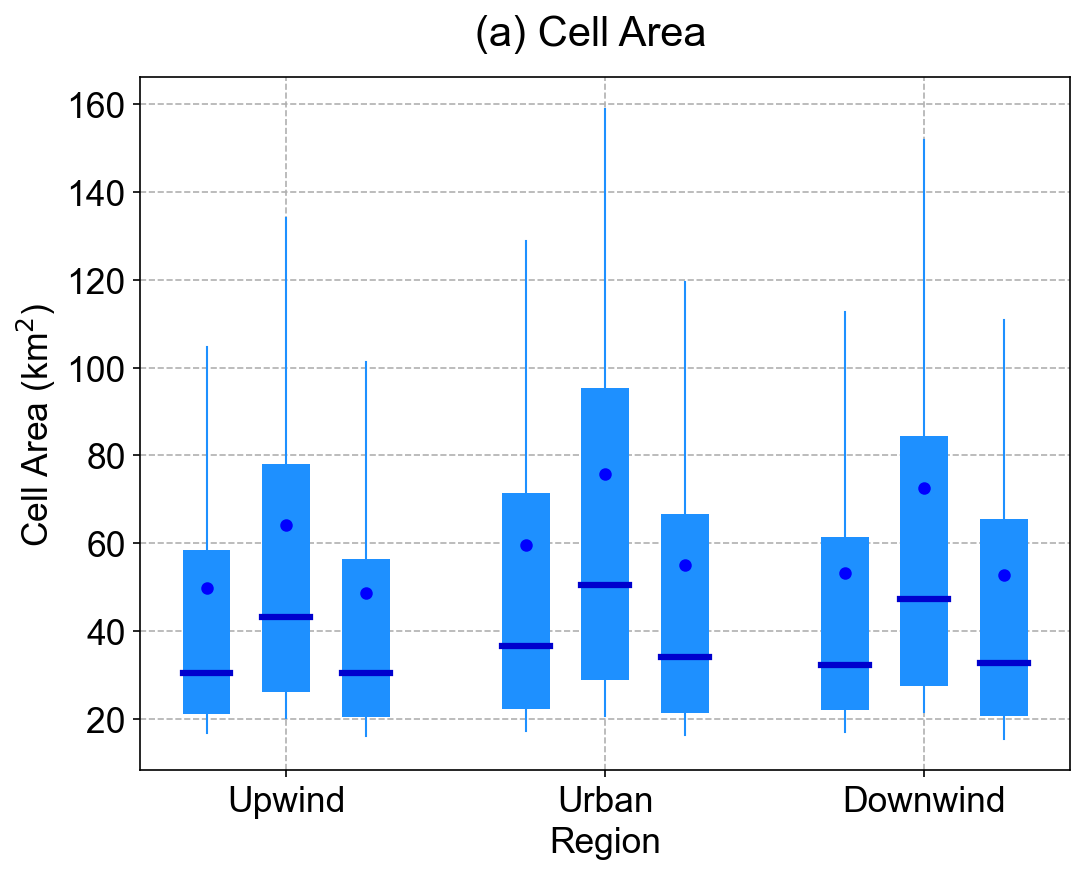

In [268]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('(a) Cell Area', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Combining data for plotting
combined_data = upwind_cell_areas_bin + urban_cell_areas_bin + downwind_cell_areas_bin

# Boxplot
ax.boxplot(combined_data, positions=positions, patch_artist=True, widths=widths, notch=False, manage_ticks=False,
           boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
           showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Cell Area (km$^2$)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

plt.show()



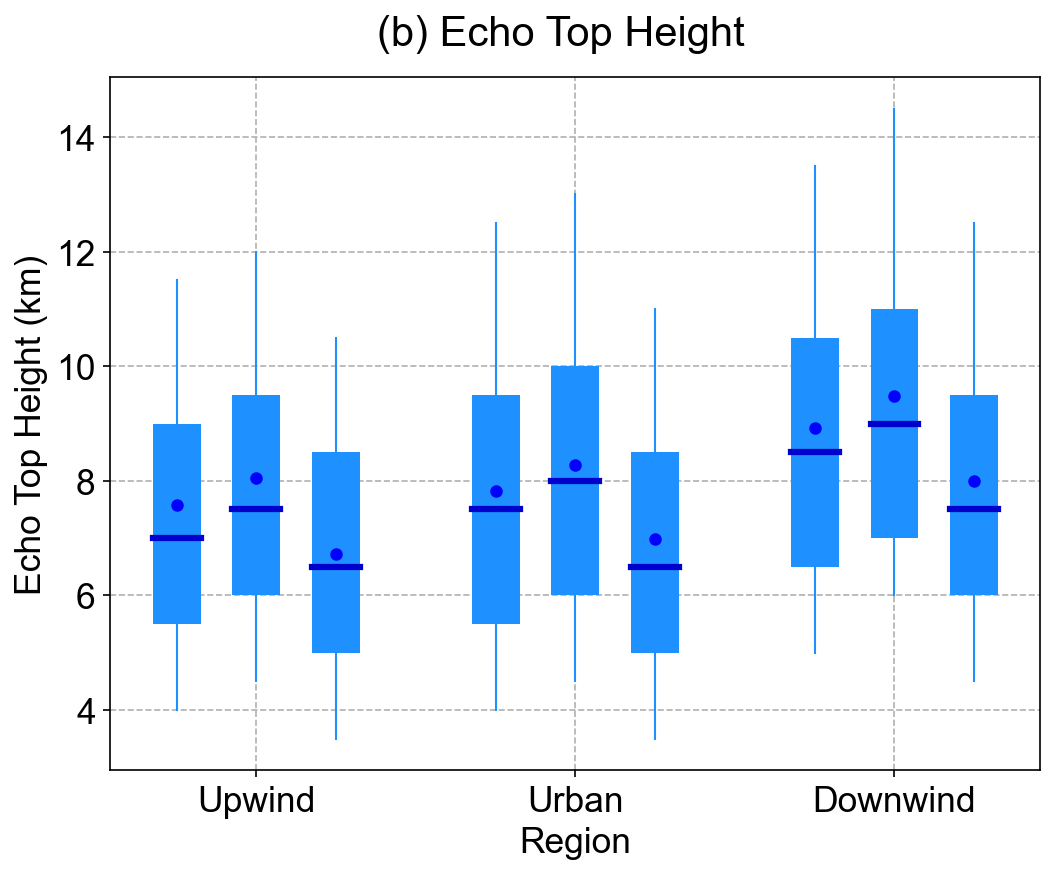

In [269]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('(b) Echo Top Height', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Combining data for plotting
combined_data = upwind_eth_bin + urban_eth_bin + downwind_eth_bin

# Boxplot
ax.boxplot(combined_data, positions=positions, patch_artist=True, widths=widths, notch=False, manage_ticks=False,
           boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
           showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Echo Top Height (km)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

plt.show()



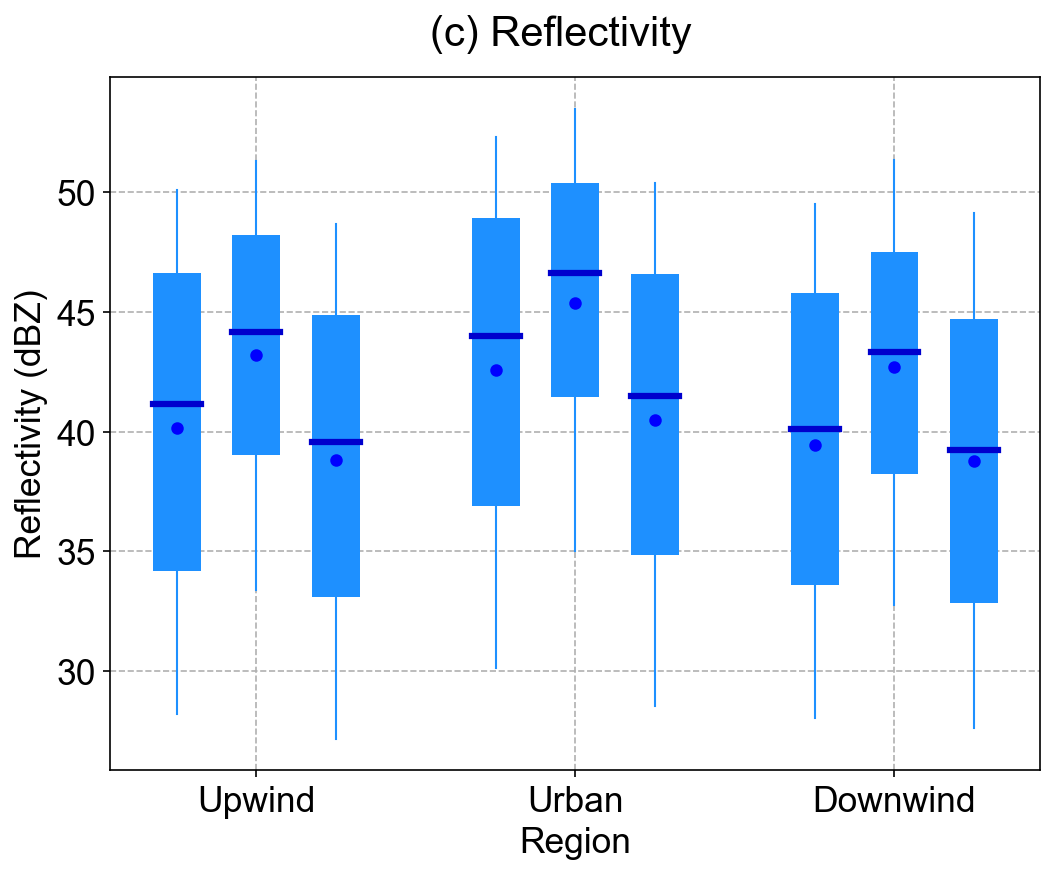

In [270]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Common boxplot properties
boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor='dodgerblue', alpha=1)
medianprops_ = dict(linestyle='-', linewidth=3, color='mediumblue')
meanpointprops_ = dict(marker='o', markeredgecolor='b', markerfacecolor='b', markersize=5)
whiskerprops_ = dict(linewidth=1, linestyle='-', color='dodgerblue')

# Main title for the figure
fig.suptitle('(c) Reflectivity', fontsize=20, y=0.95)

# Bin labels (assuming these are common for all subplots)
bin_labels = ['Developing', 'Mature', 'Dissipating']

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Combining data for plotting
combined_data = upwind_dbz_bin + urban_dbz_bin + downwind_dbz_bin

# Boxplot
ax.boxplot(combined_data, positions=positions, patch_artist=True, widths=widths, notch=False, manage_ticks=False,
           boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_, 
           showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Reflectivity (dBZ)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

plt.show()

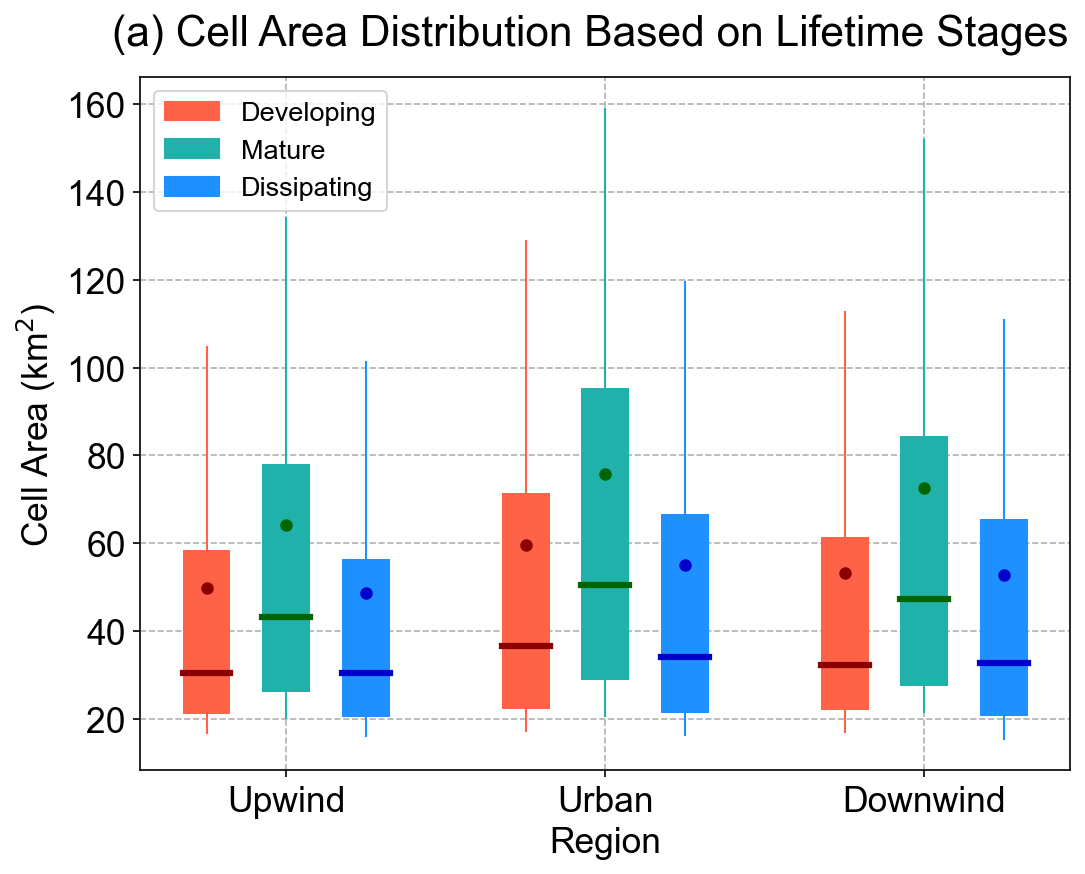

In [271]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Main title for the figure
fig.suptitle('(a) Cell Area Distribution Based on Lifetime Stages', y=0.95)

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Colors for the subplots
subplot_colors = ['darkred', 'darkgreen', 'mediumblue']
box_whisker_colors = ['tomato', 'lightseagreen', 'dodgerblue']
subplot_labels = ['Developing', 'Mature', 'Dissipating']  # Labels for the legend

# Combining data for plotting
combined_data = [upwind_cell_areas_bin, urban_cell_areas_bin, downwind_cell_areas_bin]

# Creating legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_whisker_colors, subplot_labels)]

# Creating boxplots with lighter colors
for i, data_group in enumerate(combined_data):
    for j, data in enumerate(data_group):
        color = subplot_colors[j]
        colors = box_whisker_colors[j]
        boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor=colors)  # Lighter color
        medianprops_ = dict(linestyle='-', linewidth=3, color=color)
        meanpointprops_ = dict(marker='o', markeredgecolor=color, markerfacecolor=color, markersize=5)
        whiskerprops_ = dict(linewidth=1, linestyle='-', color=colors)  # Lighter color

        ax.boxplot(data, positions=[positions[i * 3 + j]], patch_artist=True, widths=widths, notch=False, manage_ticks=False,
                   boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_,
                   showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Cell Area (km$^2$)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

# Adding legend
ax.legend(handles=legend_patches, loc=2, fontsize=13)

plt.show()


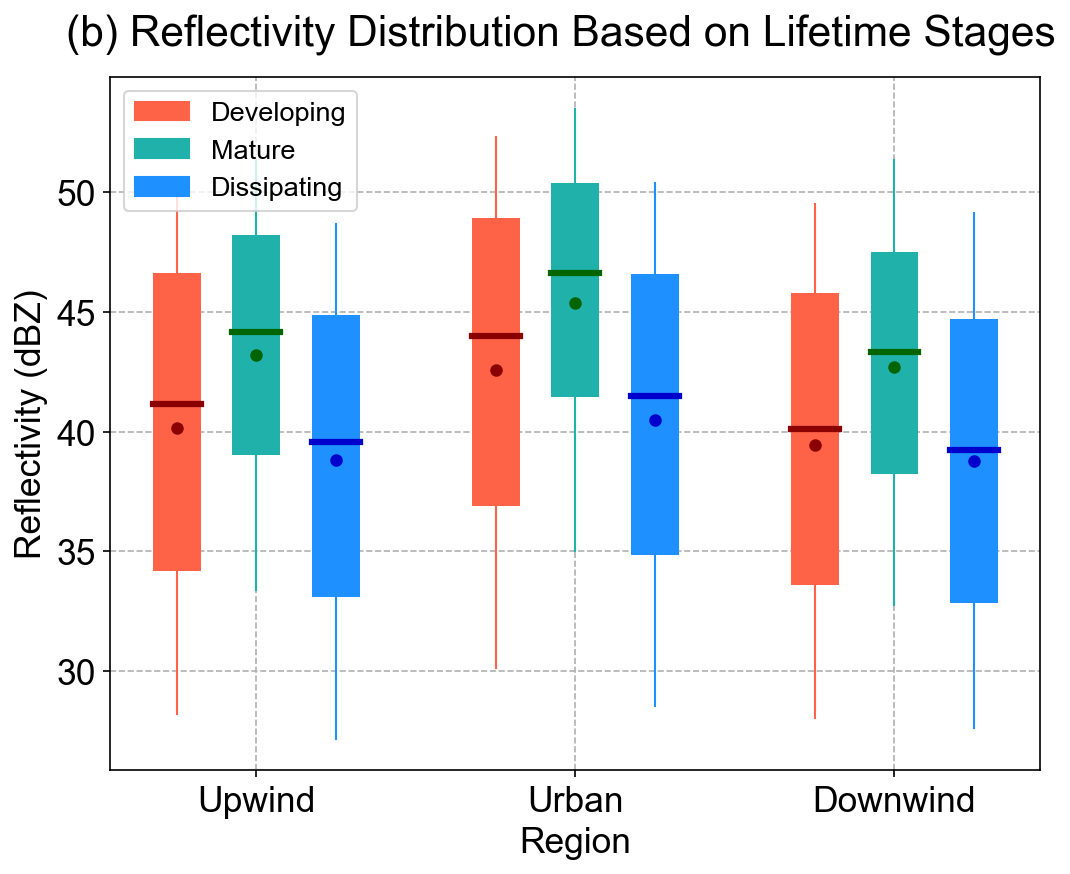

In [272]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Main title for the figure
fig.suptitle('(b) Reflectivity Distribution Based on Lifetime Stages', y=0.95)

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Colors for the subplots
subplot_colors = ['darkred', 'darkgreen', 'mediumblue']
box_whisker_colors = ['tomato', 'lightseagreen', 'dodgerblue']
subplot_labels = ['Developing', 'Mature', 'Dissipating']  # Labels for the legend

# Combining data for plotting
combined_data = [upwind_dbz_bin, urban_dbz_bin, downwind_dbz_bin]

# Creating legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_whisker_colors, subplot_labels)]

# Creating boxplots with lighter colors
for i, data_group in enumerate(combined_data):
    for j, data in enumerate(data_group):
        color = subplot_colors[j]
        colors = box_whisker_colors[j]
        boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor=colors)  # Lighter color
        medianprops_ = dict(linestyle='-', linewidth=3, color=color)
        meanpointprops_ = dict(marker='o', markeredgecolor=color, markerfacecolor=color, markersize=5)
        whiskerprops_ = dict(linewidth=1, linestyle='-', color=colors)  # Lighter color

        ax.boxplot(data, positions=[positions[i * 3 + j]], patch_artist=True, widths=widths, notch=False, manage_ticks=False,
                   boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_,
                   showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Reflectivity (dBZ)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

# Adding legend
ax.legend(handles=legend_patches, loc=2, fontsize=13)

plt.show()

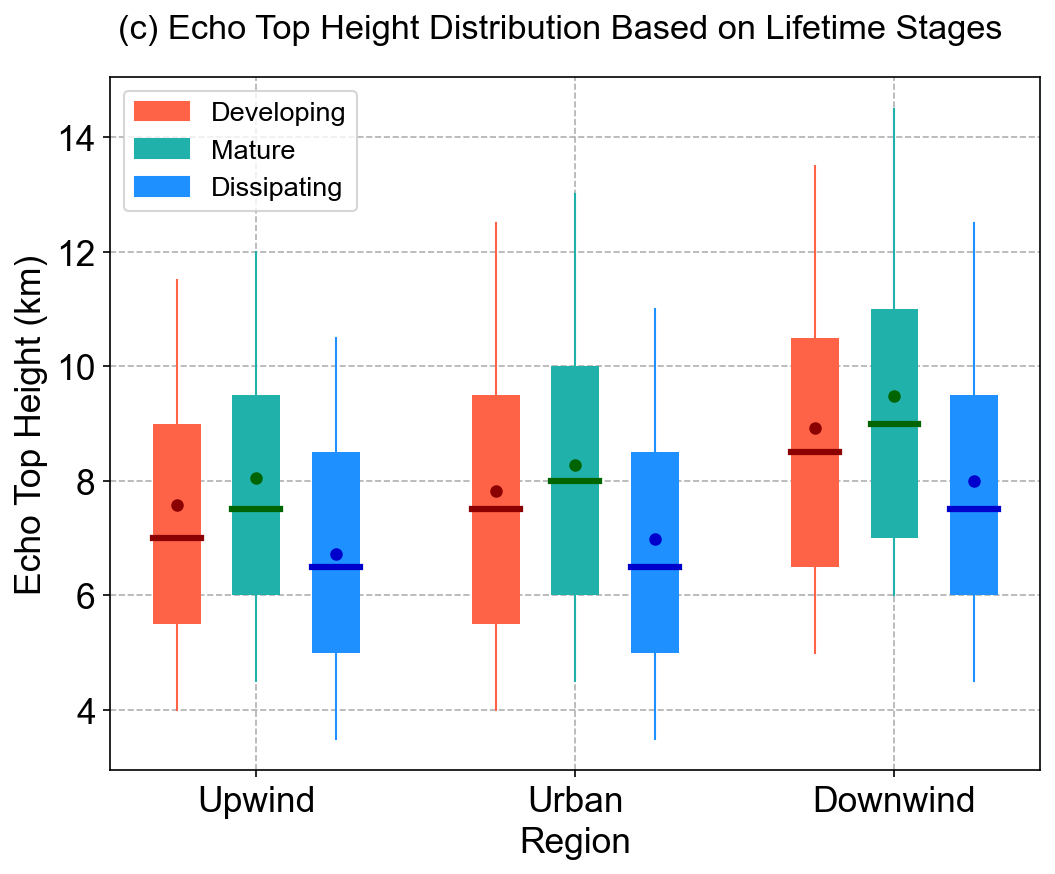

In [273]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Sample data (placeholders, replace with actual data)

# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

# Main title for the figure
fig.suptitle('(c) Echo Top Height Distribution Based on Lifetime Stages', fontsize=16.5, y=0.95)

# Plot settings
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11]  # Position for each boxplot
widths = 0.6  # Width of each boxplot

# Colors for the subplots
subplot_colors = ['darkred', 'darkgreen', 'mediumblue']
box_whisker_colors = ['tomato', 'lightseagreen', 'dodgerblue']
subplot_labels = ['Developing', 'Mature', 'Dissipating']  # Labels for the legend

# Combining data for plotting
combined_data = [upwind_eth_bin, urban_eth_bin, downwind_eth_bin]

# Creating legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_whisker_colors, subplot_labels)]

# Creating boxplots with lighter colors
for i, data_group in enumerate(combined_data):
    for j, data in enumerate(data_group):
        color = subplot_colors[j]
        colors = box_whisker_colors[j]
        boxprops_ = dict(linestyle='-', linewidth=0, color='k', facecolor=colors)  # Lighter color
        medianprops_ = dict(linestyle='-', linewidth=3, color=color)
        meanpointprops_ = dict(marker='o', markeredgecolor=color, markerfacecolor=color, markersize=5)
        whiskerprops_ = dict(linewidth=1, linestyle='-', color=colors)  # Lighter color

        ax.boxplot(data, positions=[positions[i * 3 + j]], patch_artist=True, widths=widths, notch=False, manage_ticks=False,
                   boxprops=boxprops_, medianprops=medianprops_, whiskerprops=whiskerprops_,
                   showfliers=False, showmeans=True, meanprops=meanpointprops_, whis=[10, 90], meanline=False, showcaps=False)

# Set labels and title
ax.set_ylabel('Echo Top Height (km)')
ax.set_xlabel('Region')
ax.set_xticks([2, 6, 10])
ax.set_xticklabels(['Upwind', 'Urban', 'Downwind'])
ax.grid(ls='--')

# Adding legend
ax.legend(handles=legend_patches, loc=2, fontsize=13)

plt.show()

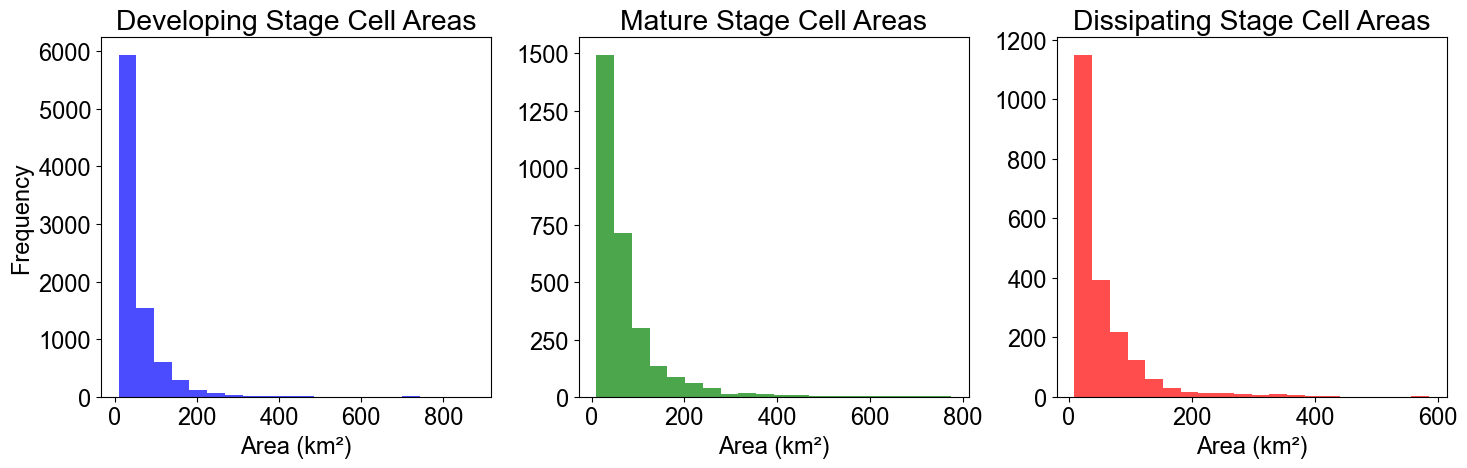

In [274]:
import matplotlib.pyplot as plt

# Creating histograms for cell areas in each stage
plt.figure(figsize=(15, 5))

# Histogram for Developing Stage
plt.subplot(1, 3, 1)
plt.hist(developing_areas, bins=20, color='blue', alpha=0.7)
plt.title('Developing Stage Cell Areas')
plt.xlabel('Area (km²)')
plt.ylabel('Frequency')

# Histogram for Mature Stage
plt.subplot(1, 3, 2)
plt.hist(mature_areas, bins=20, color='green', alpha=0.7)
plt.title('Mature Stage Cell Areas')
plt.xlabel('Area (km²)')

# Histogram for Dissipating Stage
plt.subplot(1, 3, 3)
plt.hist(dissipating_areas, bins=20, color='red', alpha=0.7)
plt.title('Dissipating Stage Cell Areas')
plt.xlabel('Area (km²)')

plt.tight_layout()
plt.show()



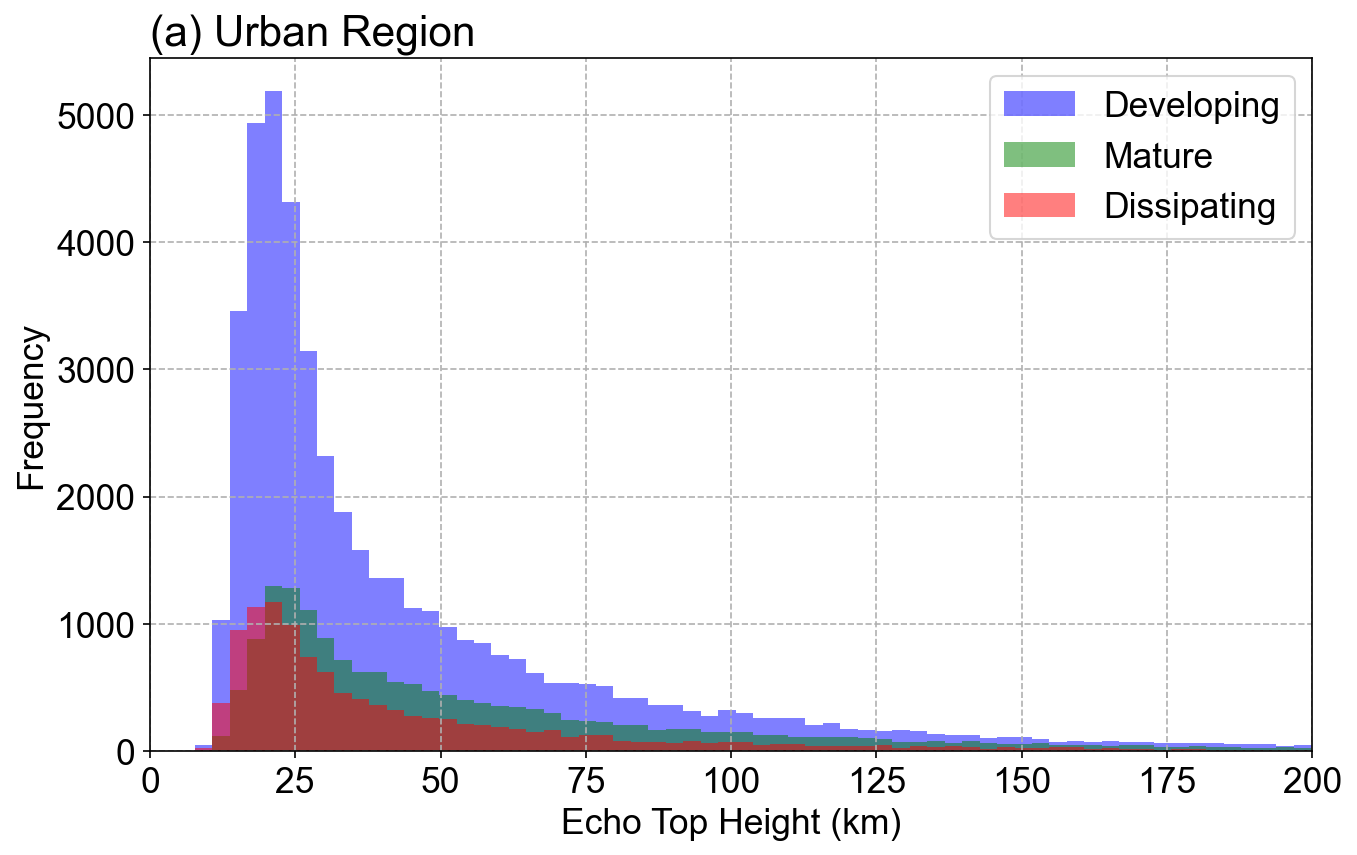

In [275]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Define the bin width
bin_width = 3  # Adjust the bin width as desired
bin_edges = np.arange(min(min(upwind_cell_areas_bin[0]), min(upwind_cell_areas_bin[1]), min(upwind_cell_areas_bin[2])), 
                      max(max(upwind_cell_areas_bin[0]), max(upwind_cell_areas_bin[1]), max(upwind_cell_areas_bin[2])) + bin_width, 
                      bin_width)

# Create the histogram plot for maxETH_20dbz of all three datasets
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(upwind_cell_areas_bin[0], bins=bin_edges, color='blue', alpha=0.5, label='Developing')
plt.hist(upwind_cell_areas_bin[1], bins=bin_edges, color='green', alpha=0.5, label='Mature')
plt.hist(upwind_cell_areas_bin[2], bins=bin_edges, color='red', alpha=0.5, label='Dissipating')
plt.title('(a) Urban Region', loc='left')
plt.xlabel('Echo Top Height (km)')
plt.ylabel('Frequency')
plt.grid(ls='--')
plt.xlim(0, 200)
plt.legend()
plt.show()


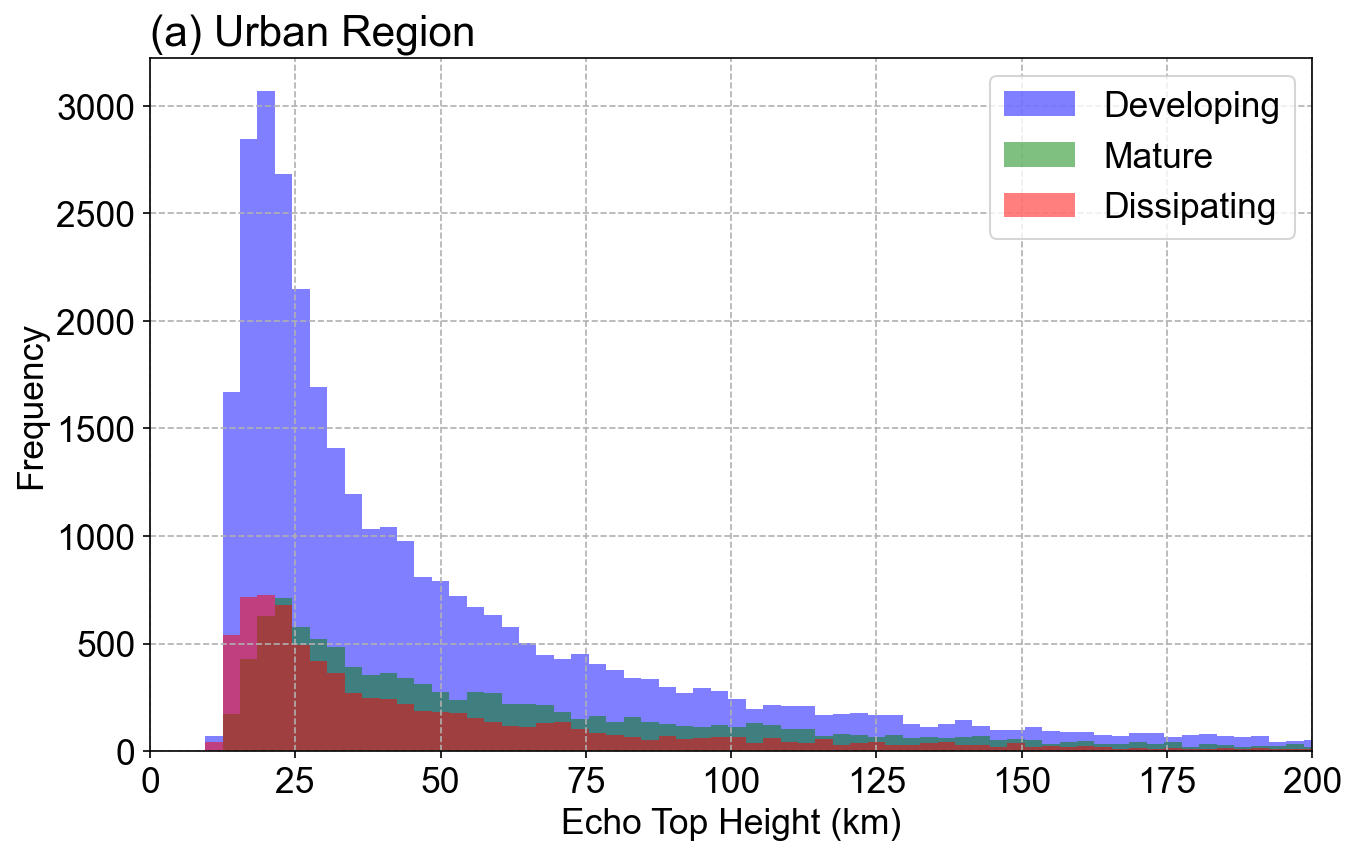

In [276]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Define the bin width
bin_width = 3  # Adjust the bin width as desired
bin_edges = np.arange(min(min(urban_cell_areas_bin[0]), min(urban_cell_areas_bin[1]), min(urban_cell_areas_bin[2])), 
                      max(max(urban_cell_areas_bin[0]), max(urban_cell_areas_bin[1]), max(urban_cell_areas_bin[2])) + bin_width, 
                      bin_width)

# Create the histogram plot for maxETH_20dbz of all three datasets
plt.figure(figsize=(10, 6), dpi=150)
plt.hist(urban_cell_areas_bin[0], bins=bin_edges, color='blue', alpha=0.5, label='Developing')
plt.hist(urban_cell_areas_bin[1], bins=bin_edges, color='green', alpha=0.5, label='Mature')
plt.hist(urban_cell_areas_bin[2], bins=bin_edges, color='red', alpha=0.5, label='Dissipating')
plt.title('(a) Urban Region', loc='left')
plt.xlabel('Echo Top Height (km)')
plt.ylabel('Frequency')
plt.grid(ls='--')
plt.xlim(0, 200)
plt.legend()
plt.show()


## Examine how long cells typically spend in each stage

In [277]:
def calculate_average_stage_durations_with_track_info(stages, data):
    track_duration = data['track_duration'].values  # Duration of each track
    time_resolution_hour = data.attrs['time_resolution_hour']  # Time resolution in hours

    # Initialize counts and total durations for each stage
    stage_counts = {'Developing': 0, 'Mature': 0, 'Dissipating': 0}
    total_durations = {'Developing': 0, 'Mature': 0, 'Dissipating': 0}

    for i in range(stages.shape[0]):  # Iterate over tracks
        current_stage = 'Unknown'
        stage_start_time = 0

        for j in range(stages.shape[1]):  # Iterate over times
            stage = stages[i, j]
            if stage != current_stage:
                if current_stage in total_durations:
                    # Calculate duration for the stage
                    duration = (j - stage_start_time) * time_resolution_hour
                    total_durations[current_stage] += duration
                    stage_counts[current_stage] += 1

                current_stage = stage
                stage_start_time = j

        # Account for the last stage duration in the track
        if current_stage in total_durations:
            duration = (stages.shape[1] - stage_start_time) * time_resolution_hour
            total_durations[current_stage] += duration
            stage_counts[current_stage] += 1

    # Calculate average durations
    average_durations = {stage: total_durations[stage] / stage_counts[stage] if stage_counts[stage] > 0 else 0 
                         for stage in total_durations}

    return average_durations

# Calculate the average duration of each stage
average_stage_durations_upwind = calculate_average_stage_durations_with_track_info(advanced_cell_stages_upwind, data_upwind)
average_stage_durations_urban = calculate_average_stage_durations_with_track_info(advanced_cell_stages_urban, data_urban)
average_stage_durations_downwind = calculate_average_stage_durations_with_track_info(advanced_cell_stages_downwind, data_downwind)


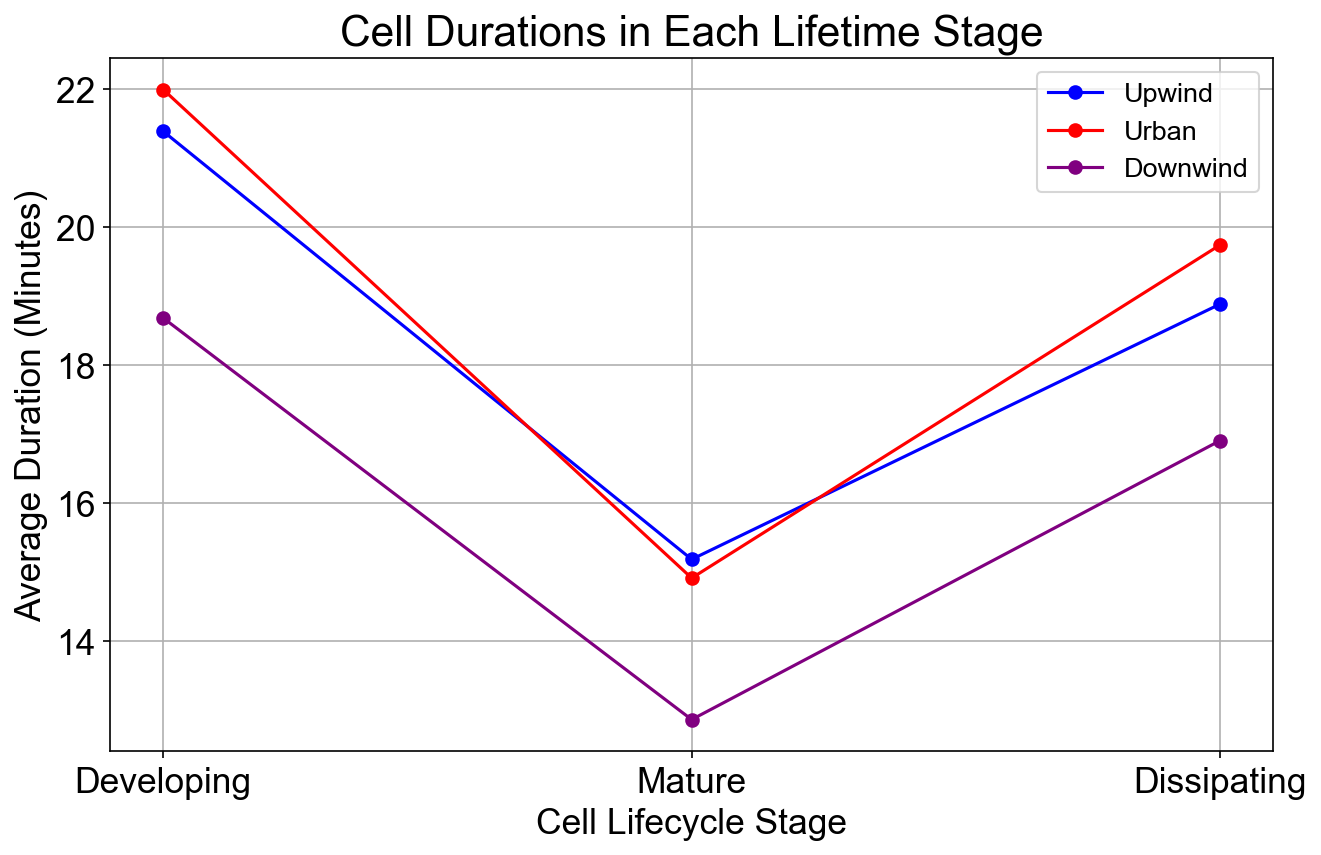

In [278]:
# Converting the average durations from hours to minutes for all three cases
average_durations_1_minutes = {stage: hours * 60 for stage, hours in average_stage_durations_upwind.items()}
average_durations_2_minutes = {stage: hours * 60 for stage, hours in average_stage_durations_urban.items()}
average_durations_3_minutes = {stage: hours * 60 for stage, hours in average_stage_durations_downwind.items()}

# Preparing the data for plotting (in minutes)
values_1_minutes = list(average_durations_1_minutes.values())
values_2_minutes = list(average_durations_2_minutes.values())
values_3_minutes = list(average_durations_3_minutes.values())

# Plotting the average durations in minutes using line plots
# Setting up matplotlib parameters
mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Creating a single subplot layout
fig, ax = plt.subplots(figsize=[10, 6], dpi=150)
plt.plot(stages, values_1_minutes, label='Upwind', marker='o', color='blue')
plt.plot(stages, values_2_minutes, label='Urban', marker='o', color='red')
plt.plot(stages, values_3_minutes, label='Downwind', marker='o', color='purple')

plt.xlabel('Cell Lifecycle Stage')
plt.ylabel('Average Duration (Minutes)')
plt.title('Cell Durations in Each Lifetime Stage')
plt.legend(fontsize=13)
plt.grid(True)
plt.show()



## Identify if there are specific times of day or environmental conditions when cells are more likely to be in a particular stage.

### Upwind

In [291]:
# Convert the base_time to pandas datetime and extract hour of the day
base_time_pd = pd.to_datetime(data_upwind['base_time'].values.ravel())
base_time_hours = base_time_pd.hour

# Classify time of day
time_of_day = pd.cut(base_time_hours, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Flatten the stages array
flattened_stages = advanced_cell_stages_upwind.ravel()

# Create DataFrame for analysis
df = pd.DataFrame({'TimeOfDay': time_of_day, 'CellStage': flattened_stages})
stage_frequency_by_time = df.groupby(['TimeOfDay', 'CellStage']).size().unstack(fill_value=0)

# Normalize the frequencies to get proportions
stage_proportions_by_time = stage_frequency_by_time.div(stage_frequency_by_time.sum(axis=1), axis=0)

# (stage_proportions_by_time*100).to_csv('Cell Durations.csv')

stage_proportions_by_time*100


CellStage,Developing,Dissipating,Mature,Unknown
TimeOfDay,,,,
Night,30.745844,7.238502,11.934795,50.080859
Morning,32.127833,7.671822,11.748328,48.452017
Afternoon,35.161807,7.711248,12.547878,44.579067
Evening,34.573364,9.556061,11.825193,44.045383


### Urban

In [292]:
# Convert the base_time to pandas datetime and extract hour of the day
base_time_pd = pd.to_datetime(data_urban['base_time'].values.ravel())
base_time_hours = base_time_pd.hour

# Classify time of day
time_of_day = pd.cut(base_time_hours, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Flatten the stages array
flattened_stages = advanced_cell_stages_urban.ravel()

# Create DataFrame for analysis
df = pd.DataFrame({'TimeOfDay': time_of_day, 'CellStage': flattened_stages})
stage_frequency_by_time = df.groupby(['TimeOfDay', 'CellStage']).size().unstack(fill_value=0)

# Normalize the frequencies to get proportions
stage_proportions_by_time = stage_frequency_by_time.div(stage_frequency_by_time.sum(axis=1), axis=0)

# (stage_proportions_by_time*100).to_csv('Cell Durations.csv')

stage_proportions_by_time*100


CellStage,Developing,Dissipating,Mature,Unknown
TimeOfDay,,,,
Night,26.757844,8.608206,9.300080,55.333870
Morning,29.836241,6.106520,9.817876,54.239363
Afternoon,32.210696,6.651623,11.279132,49.858548
Evening,34.798889,8.636972,10.630594,45.933546


### Downwind

In [286]:
# Convert the base_time to pandas datetime and extract hour of the day
base_time_pd = pd.to_datetime(data_downwind['base_time'].values.ravel())
base_time_hours = base_time_pd.hour

# Classify time of day
time_of_day = pd.cut(base_time_hours, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Flatten the stages array
flattened_stages = advanced_cell_stages_downwind.ravel()

# Create DataFrame for analysis
df = pd.DataFrame({'TimeOfDay': time_of_day, 'CellStage': flattened_stages})
stage_frequency_by_time = df.groupby(['TimeOfDay', 'CellStage']).size().unstack(fill_value=0)

# Normalize the frequencies to get proportions
stage_proportions_by_time = stage_frequency_by_time.div(stage_frequency_by_time.sum(axis=1), axis=0)

#(stage_proportions_by_time*100).to_csv('Cell Durations.csv')

stage_proportions_by_time*100


CellStage,Developing,Dissipating,Mature,Unknown
TimeOfDay,,,,
Night,28.972868,13.404393,14.308786,43.313953
Morning,33.129638,7.289393,14.142296,45.438673
Afternoon,31.570302,4.960578,10.381078,53.088042
Evening,34.460931,7.841002,10.250476,47.447591


## To calculate hourly values

In [ ]:
# Correctly extracting the hour of the day
base_time_hours = base_time_pd.hour  # Extracting hour as a number

# Create DataFrame for hourly analysis
hourly_df = pd.DataFrame({'Hour': base_time_hours, 'CellStage': flattened_stages})

# Group by each hour and calculate the frequency of each stage
hourly_stage_frequency = hourly_df.groupby(['Hour', 'CellStage']).size().unstack(fill_value=0)

# Normalize the frequencies to get proportions for each hour
hourly_stage_proportions = hourly_stage_frequency.div(hourly_stage_frequency.sum(axis=1), axis=0)

#hourly_stage_proportions.head(24)  # Displaying proportions for each hour

## SIgnificance test

In [ ]:
from scipy.stats import chi2_contingency

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(stage_frequency_by_time)

# Print the p-value
print(f"Chi-Squared Test p-value: {p}")


Chi-Squared Test p-value: 2.3898457261403907e-65


In [ ]:
from scipy.stats import chi2_contingency
from itertools import combinations

# Get the counts for the cell stages at different times of day
stage_counts_by_time = df.groupby(['TimeOfDay', 'CellStage']).size().unstack(fill_value=0)

# List of all time periods for pairwise comparison
time_periods = stage_counts_by_time.index

# Perform pairwise comparisons
p_values = []
for (time1, time2) in combinations(time_periods, 2):
    contingency_table = stage_counts_by_time.loc[[time1, time2]]
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append({'Time1': time1, 'Time2': time2, 'p-value': p})

# Convert to DataFrame for better readability
pairwise_p_values = pd.DataFrame(p_values)

# Adjust for multiple comparisons using Bonferroni correction
alpha = 0.05
num_tests = len(pairwise_p_values)
bonferroni_threshold = alpha / num_tests
pairwise_p_values['Significant'] = pairwise_p_values['p-value'] < bonferroni_threshold

pairwise_p_values


,Time1,Time2,p-value,Significant
0,Night,Morning,9.483676e-12,True
1,Night,Afternoon,1.016095e-55,True
2,Night,Evening,1.347051e-34,True
3,Morning,Afternoon,2.407962e-12,True
4,Morning,Evening,7.155307e-07,True
5,Afternoon,Evening,2.539967e-19,True
